In [6]:
import numpy as np

def majority_vote(labels):
    """
    Perform majority voting to determine the label of a data point
    given multiple labelers with noisy labels.
    
    Args:
    labels: list of labels provided by labelers
    
    Returns:
    label: the majority label
    """
    
    unique_labels, counts = np.unique(labels, return_counts=True)
    max_count_idx = np.argmax(counts)
    label = unique_labels[max_count_idx]
    
    return label


In [10]:
majority_vote(labels)

'label2'

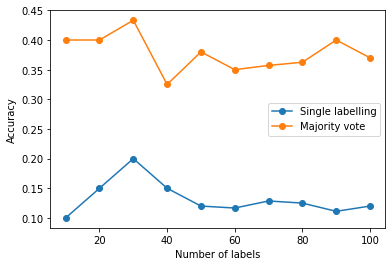

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
X = np.random.rand(100, 2)
y_true = np.zeros(100)
y_true[X[:, 0] > X[:, 1]] = 1

# Simulate noisy labels using single labelling
p_error = 0.8
y_noisy = np.where(np.random.rand(100) < p_error, 1 - y_true, y_true)

# Define functions for majority vote and round-robin labelling
def majority_vote(labels):
    return np.bincount(labels.astype(int)).argmax()

def round_robin(labels, n_rounds):
    n_labels = len(labels)
    labels_rr = np.zeros(n_labels, dtype=int)
    for i in range(n_rounds):
        start = i % n_labels
        labels_rr[start::n_labels] = labels[start::n_labels]
    return labels_rr

# Compute accuracy for different number of labels using single labelling
n_labels_list = range(10, 101, 10)
acc_sl = []
for n_labels in n_labels_list:
    y_sl = y_noisy[:n_labels]
    acc_sl.append(np.mean(y_sl == y_true[:n_labels]))

# Compute accuracy for different number of labels using majority vote
acc_mv = []
for n_labels in n_labels_list:
    y_mv = np.zeros(n_labels, dtype=int)
    for i in range(n_labels):
        labels = y_noisy[:i+1]
        y_mv[i] = majority_vote(labels)
    acc_mv.append(np.mean(y_mv == y_true[:n_labels]))

# Plot accuracy vs no. of labels for each method
plt.plot(n_labels_list, acc_sl, '-o', label='Single labelling')
plt.plot(n_labels_list, acc_mv, '-o', label='Majority vote')
plt.xlabel('Number of labels')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
import numpy as np

# Generate synthetic dataset
X = np.random.rand(100, 2)
y_true = np.zeros(100)
y_true[X[:, 0] > X[:, 1]] = 1

# Print dataset
print("Features:")
print(X)
print("Labels:")
print(y_true)


Features:
[[0.2982059  0.08914988]
 [0.10640186 0.76723664]
 [0.83469833 0.63007334]
 [0.12186585 0.35579269]
 [0.88015654 0.10970059]
 [0.14828429 0.87762828]
 [0.55690575 0.01718876]
 [0.98237212 0.99801984]
 [0.61665373 0.43584268]
 [0.66849426 0.0385286 ]
 [0.12226279 0.73171865]
 [0.004741   0.52792987]
 [0.96778678 0.45017223]
 [0.38587589 0.27358412]
 [0.11244389 0.31105555]
 [0.35161742 0.1743216 ]
 [0.98832404 0.77288824]
 [0.57684912 0.64414837]
 [0.59588624 0.50603552]
 [0.01354851 0.57531772]
 [0.80716329 0.61907643]
 [0.77650927 0.27861271]
 [0.39886154 0.80465488]
 [0.01824657 0.78934079]
 [0.89527305 0.76308777]
 [0.67258428 0.37596759]
 [0.00535467 0.89066682]
 [0.33543974 0.06887216]
 [0.64571399 0.67320681]
 [0.67588008 0.30462745]
 [0.50241482 0.33420322]
 [0.64659527 0.02944751]
 [0.06128491 0.37794277]
 [0.66527193 0.45831177]
 [0.6413567  0.21668543]
 [0.61897397 0.89144851]
 [0.21550679 0.15363488]
 [0.64598442 0.15385741]
 [0.72621997 0.10104947]
 [0.44983757 0.